## Aim:
##### The main objective of this project is to identify fraudulent transactions while reducing the number of false positives for fraud classifications using machine learning-based techniques like Random Forest Classifier, Linear Regression, XGBoost, and a deep learning technique called Multi-Layer Perceptron, as well as to offer a perspective for algorithm performance analysis.


### Steps Followed:

1. EDA with Visualization to understand the data
2. Data Preprocessing - Data Undersampling
3. Model Building & Train the Models
4. Make Predictions
5. Evaluate Model Performance
6. Visualize Results on Confusion Matrices and ROC Curves

### Import Required Libraries

In [1]:
pip install scikit-learn==1.2.2


In [2]:
pip install imbalanced-learn

In [3]:
!pip install cartopy
import cartopy

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, confusion_matrix, roc_curve, roc_auc_score
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")



### Evaluating the Credit Card Dataset by performing EDA Techniques

Reading the dataset file named: 'creditcard.csv'

In [6]:
credit_card_ds = pd.read_csv('creditcard.csv')

Checking the data by viewing it's description and first five rows

In [7]:
credit_card_ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
credit_card_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


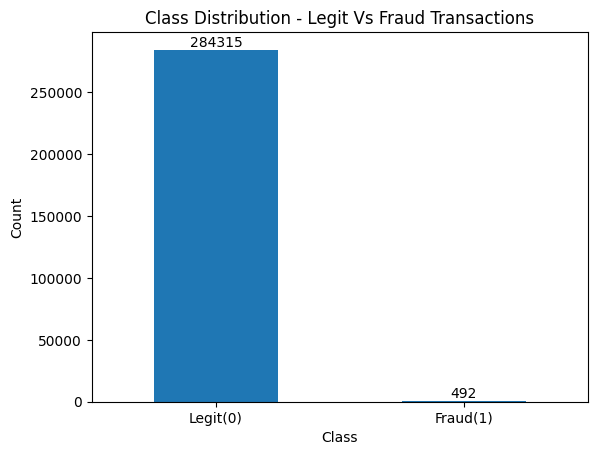

In [9]:
#Counting the number of legit and fraud transactions in the Class Column

value_counts = credit_card_ds['Class'].value_counts()
print(value_counts)
bar = value_counts.plot.bar()
bar.set_xlabel('Class')
bar.set_ylabel('Count')
bar.set_title('Class Distribution - Legit Vs Fraud Transactions')
bar.set_xticklabels(['Legit(0)', 'Fraud(1)'], rotation=0)
for p in bar.containers:
    plt.bar_label(p, label_type='edge')
plt.show()

In [10]:
#Checking null values in the dataset

print(credit_card_ds.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


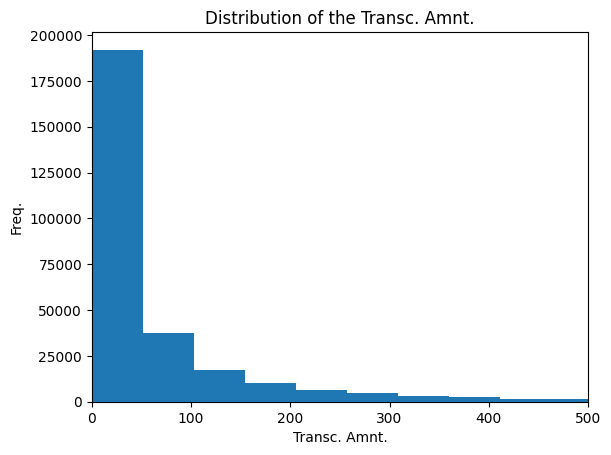

In [11]:
#Plotting histogram across Amount to check the distribution

plt.hist(credit_card_ds['Amount'], bins=500)
plt.xlabel('Transc. Amnt.')
plt.ylabel('Freq.')
plt.title('Distribution of the Transc. Amnt.')
plt.xlim(0, 500)
plt.show()

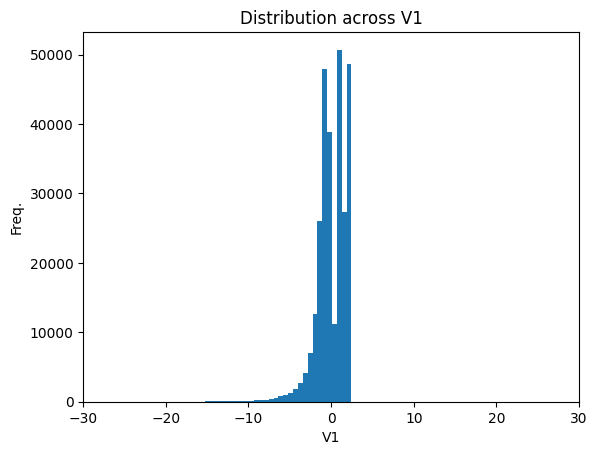

In [12]:
#Plotting histogram across one of the PCA Vectors, in this case V1 for checking the distribution

plt.hist(credit_card_ds['V1'], bins=100)
plt.xlabel('V1')
plt.ylabel('Freq.')
plt.title('Distribution across V1')
plt.xlim(-30, 30)
plt.show()

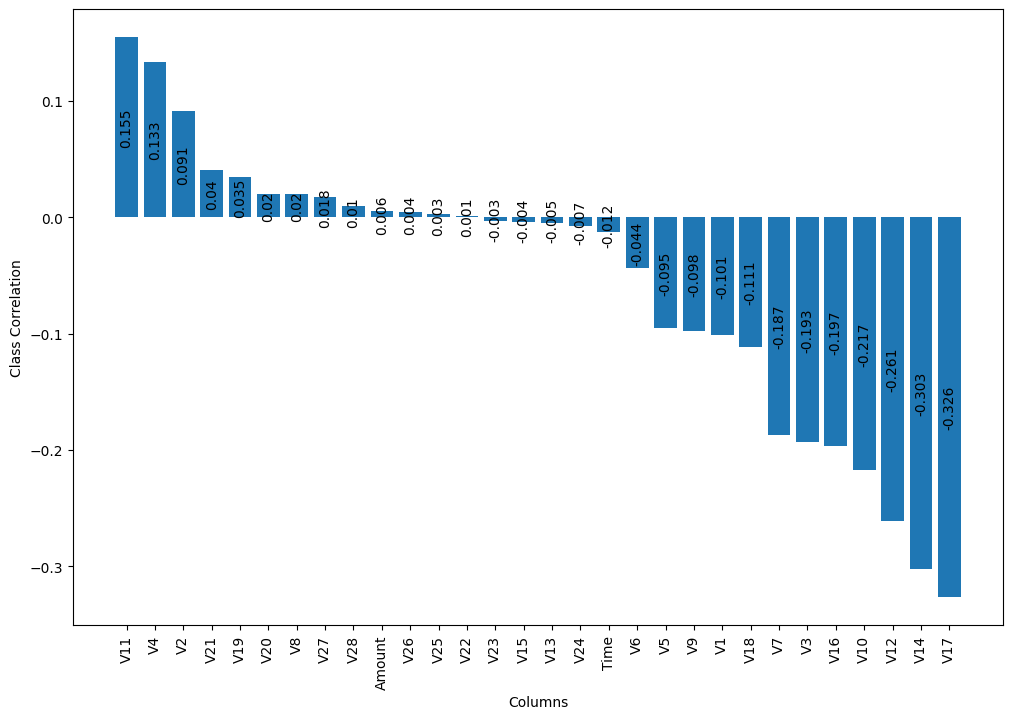

In [13]:
corr = credit_card_ds.corr()['Class']

# drop the Class column
corr = corr.drop(['Class'])

# sort correlation values in descending order
corr_sorted = corr.sort_values(ascending=False)

# create bar chart of correlations
plt.figure(figsize=(12,8))
bars = plt.bar(corr_sorted.index, corr_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Class Correlation')
plt.bar_label(bars, labels=corr_sorted.values.round(3), label_type='center', rotation=90)

plt.show()

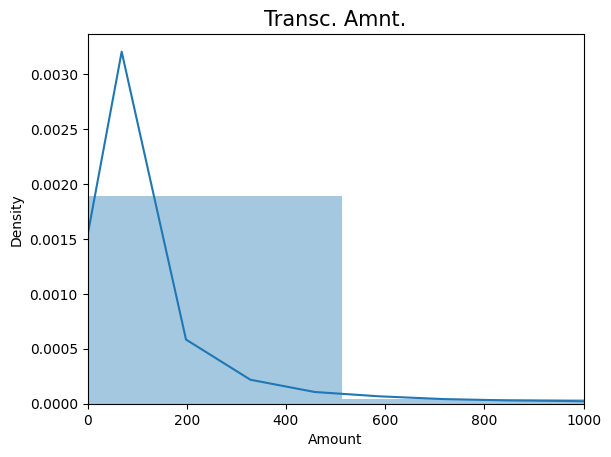

In [14]:
#Distribution of Amount

sbn.distplot(credit_card_ds['Amount'].values)
plt.title('Transc. Amnt.', fontsize=15)
plt.xlim([min(credit_card_ds['Amount'].values),1000])
plt.xlabel('Amount')

plt.show()

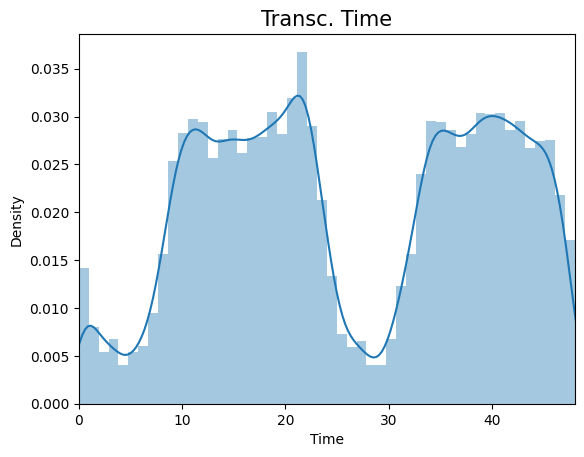

In [15]:
#Distribution of Time

sbn.distplot(credit_card_ds['Time'].values/(60*60))
plt.title('Transc. Time', fontsize=15)
plt.xlim([min(credit_card_ds['Time'].values/(60*60)), max(credit_card_ds['Time'].values/(60*60))])
plt.xlabel('Time')

plt.show()

Text(0, 0.5, 'Skewness')

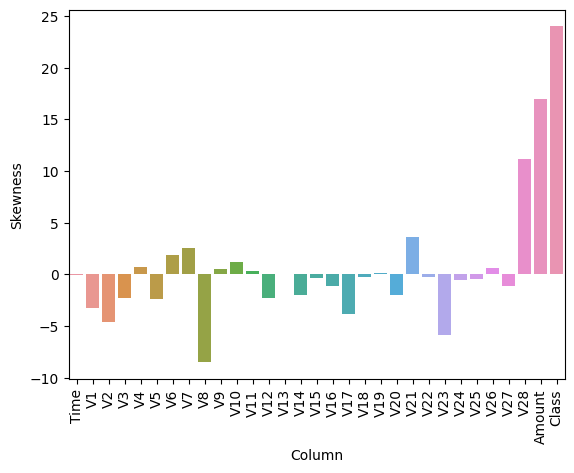

In [20]:
import pandas as pd
import seaborn as sbn
data = pd.read_csv('creditcard.csv')

skewness = data.skew()


skew_plt = sbn.barplot(x=skewness.index, y=skewness.values)
skew_plt.set_xticklabels(skew_plt.get_xticklabels(), rotation=90)
skew_plt.set_xlabel('Column')
skew_plt.set_ylabel('Skewness')



Text(0.5, 1.0, 'Original Skewness Dstrbn.')

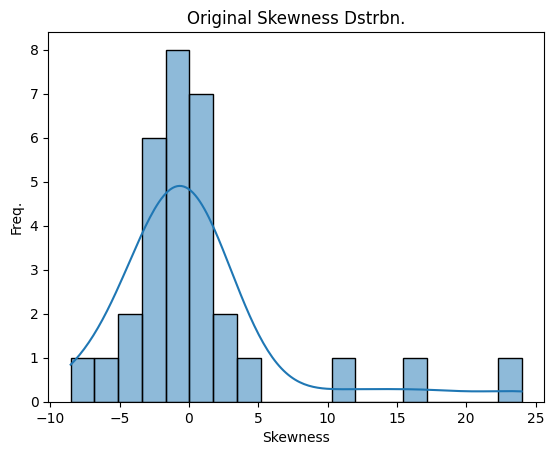

In [22]:
org_skew = credit_card_ds.skew()

sbn.histplot(org_skew, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Freq.')
plt.title('Original Skewness Dstrbn.')

Text(0.5, 1.0, 'New Skewness Dstrbn.')

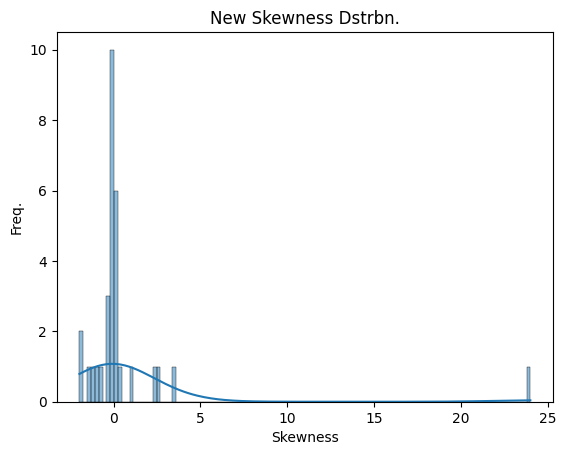

In [23]:
# Create a PowerTransformer object
powerT = PowerTransformer(method='yeo-johnson')

# Fitting the power transformer to the data
powerT.fit(credit_card_ds)

# Transforming the data using the fitted transformer
changed_data = powerT.transform(credit_card_ds)

# Converting the transformed data back to a DataFrame
changed_data = pd.DataFrame(changed_data, columns=credit_card_ds.columns)

#Checking the skewness of the transformed data

new_skew = changed_data.skew()

sbn.histplot(new_skew, kde=True)
plt.xlabel('Skewness')
plt.ylabel('Freq.')
plt.title('New Skewness Dstrbn.')

### Observation:

- The data includes 8 Rows and 31 Columns.

- The Columns Names from V1 to V28 are hidden as it contains people's confidential transactional information. Hence they are already converted to PCA Vectors.

- We have Time and Amount column and also the Class column represents if the transaction is a fraud or not. '0' means it's not a fraud and '1' means it's a fraud. On further analysis, we can see that the amount of frauds (492) in the data are much less than the legit transactions (284315). This indicates the data is highly unbalanced and might require undersampling or oversampling.

- The data does not have any null values in any of the columns.

- From the histograms, we can observe that the data has maximum transactional amounts below 100 with a mean of 88. The values of PCA vector V1 are maximum between -5 to 5.

- Further, we have also checked the skewness across each column by plotting its distribution across histogram and have fixed it using a Power Transformer

### Sampling the data
#### From the observations we found out that the data is highly unbalanced, hence we are going to perform oversampling on the fraud values and then undersampling on the legit values to match the count of legit and fraud transactions

In [24]:
#Oversampling the fraud values to 3000 Count
cls_0 = credit_card_ds[credit_card_ds['Class'] == 0]
cls_1 = credit_card_ds[credit_card_ds['Class'] == 1]
cls_1_over = cls_1.sample(3000, replace=True)
test_over = pd.concat([cls_1_over, cls_0], axis=0)

In [36]:
from imblearn.under_sampling import NearMiss


input_data = test_over.drop('Class', axis=1)
labels = test_over['Class']
sampler = NearMiss(n_neighbors=10)
S, r = sampler.fit_resample(input_data, labels)





0    3000
1    3000
Name: Class, dtype: int64


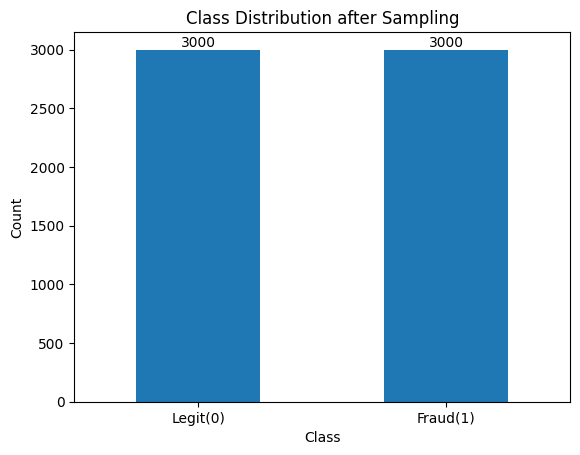

In [37]:
#Counts of legit and fraud values in the sampled dataset
print(r.value_counts())
fig, ax = plt.subplots()
bar = r.value_counts().plot(kind='bar')
bar.set_xlabel('Class')
bar.set_ylabel('Count')
bar.set_title('Class Distribution after Sampling')
bar.set_xticklabels(['Legit(0)', 'Fraud(1)'], rotation=0)
for p in bar.containers:
    plt.bar_label(p, label_type='edge')
plt.show()

#### Now that we have completed the sampling, the data is now balanced, we will continue with spliting the data into Training and Testing

In [38]:
#Splitting the dataset - 70% for Training and 30% for Testing

R_trn, R_tst, s_trn, s_tst = train_test_split(S, r, test_size=0.3, random_state=4, stratify=r)
scaler = RobustScaler()
R_trn = scaler.fit_transform(R_trn)
R_tst = scaler.fit_transform(R_tst)

### Proceeding to Modeling and Predictions
### 1. Random Forest Modeling

Cross-validation Scores: [0.99761905 0.9952381  0.99761905 1.         0.9952381  0.99761905
 0.99761905 0.9952381  0.99761905 1.        ]
Cross-validation Average Score: 0.9973809523809525


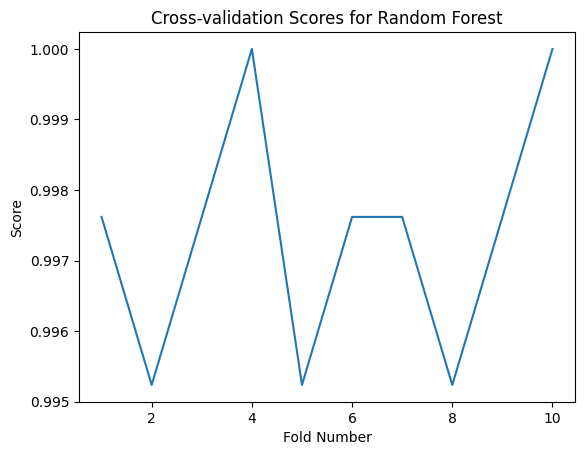

In [39]:

n = 50
RFMod = RandomForestClassifier(n, random_state = 2)
cvs = cross_val_score(RFMod, R_trn , s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for Random Forest')
plt.show()

In [40]:
n = 50

#Load Random Forest Classifier Model
RFMod = RandomForestClassifier(n, random_state = 2)

# Fit the model on the training data
RFMod.fit(R_trn ,s_trn)

# Predict the outputs for the training data
trains = RFMod.predict(R_trn )
print('Training Set Results for Random Forest:')

# Print the classification values and accuracy score for the training data
print(classification_report(s_trn,trains.round()))
rfacc=round(accuracy_score(s_trn,trains.round())*100,2)
print('Training Set Accuracy for Random Forest: '+str(rfacc)+'%')
print()

# Predict the outputs for the testing data
preds = RFMod.predict(R_tst)
print('Testing Set Results for Random Forest:')

# Print the classification values and accuracy score for testing data
print(classification_report(s_tst,preds.round()))
rfacc=round(accuracy_score(s_tst,preds.round())*100,2)
print('Testing Set Accuracy for Random Forest: '+str(rfacc)+'%')

Training Set Results for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training Set Accuracy for Random Forest: 100.0%

Testing Set Results for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       1.00      0.98      0.99       900

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800

Testing Set Accuracy for Random Forest: 99.06%


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

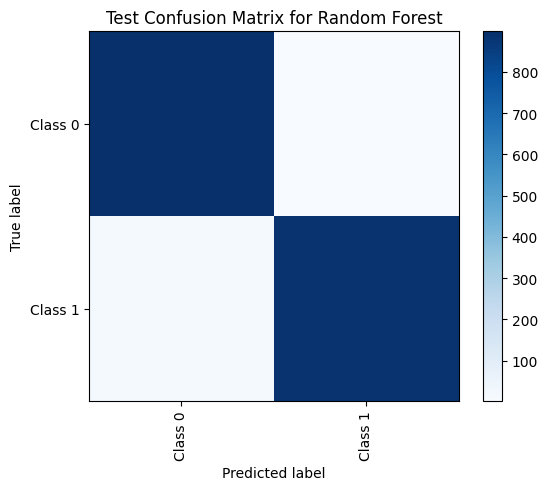

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Fit the model
n = 50
RFMod = RandomForestClassifier(n, random_state=2)
RFMod.fit(R_trn, s_trn)

# Test Set
tst_prdc = RFMod.predict(R_tst)
conf_matrx = confusion_matrix(s_tst, tst_prdc.round())

# Plot confusion matrix
plt.imshow(conf_matrx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix for Random Forest')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels
plt.xticks([0, 1], classes, rotation='vertical')
plt.yticks([0, 1], classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


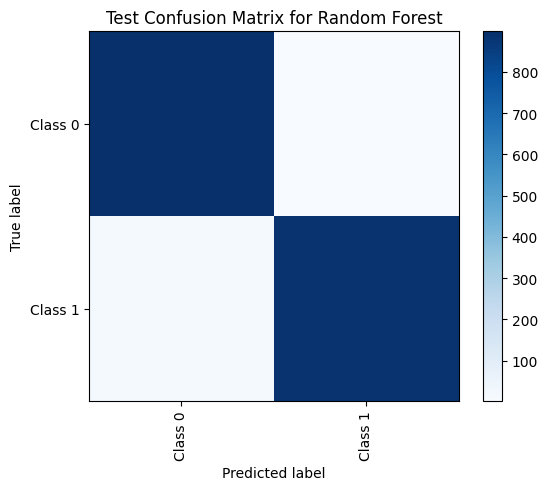

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Test Set
tst_prdc = RFMod.predict(R_tst)
conf_matrx = confusion_matrix(s_tst, tst_prdc.round())
# Plot confusion matrix
plt.imshow(conf_matrx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Test Confusion Matrix for Random Forest')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels
plt.xticks([0, 1], classes, rotation='vertical')
plt.yticks([0, 1], classes)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


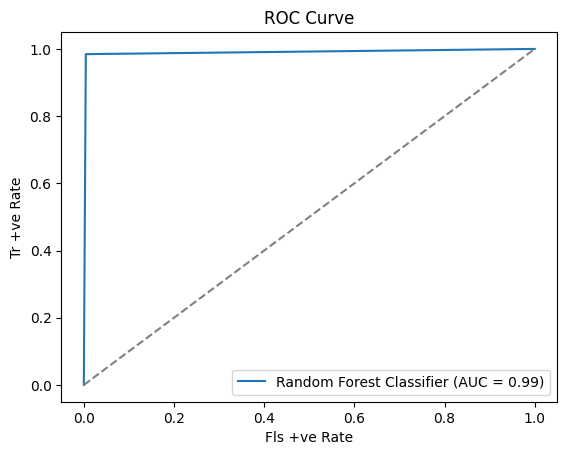

In [47]:
RFMod = RandomForestClassifier()
RFMod.fit(R_trn , s_trn)
s_prb = RFMod.predict(R_tst)

# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, s_prb)

# Calculate AUC score
auc = roc_auc_score(s_tst, s_prb)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Fls +ve Rate')
plt.ylabel('Tr +ve Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 2. Linear Regression Modeling

Cross-validation Scores: [0.70467839 0.69538495 0.65831783 0.66622042 0.69026969 0.68578489
 0.69394071 0.67794549 0.70837189 0.6876222 ]
Cross-validation Average Score: 0.6868536472692224


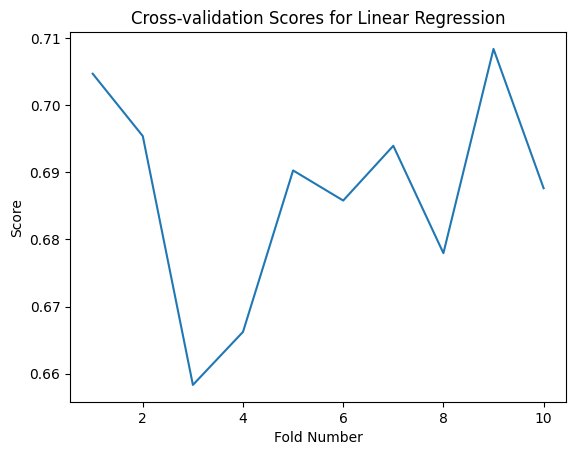

In [48]:
LRMod = LinearRegression()

cvs = cross_val_score(LRMod, R_trn , s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for Linear Regression')
plt.show()

In [49]:
#Load Linear Regression Model
LRMod = LinearRegression()

# Fit the model on the training data
LRMod.fit(R_trn , s_trn)

# Predict the outputs for the training data
train_preds = LRMod.predict(R_trn )

# Convert predicted outputs to binary values using threshold of 0.5
train_preds = [1 if x >= 0.5 else 0 for x in train_preds]

# Print the classification values and accuracy score for the training data
print('Training Set Results for Linear Regression:')
print(classification_report(s_trn, train_preds))
lr_acc = round(accuracy_score(s_trn, train_preds)*100, 2)
print('Training Set Accuracy for Linear Regression:', lr_acc, '%')
print()

# Predict the outputs for the testing data
tst_prdc = LRMod.predict(R_tst)

# Convert the predicted outputs to binary values using threshold of 0.5
tst_prdc = [1 if x >= 0.5 else 0 for x in tst_prdc]

# Print the classification values and accuracy score for testing data
print('Testing Set Results for Linear Regression:')
print(classification_report(s_tst, tst_prdc))
lr_acc = round(accuracy_score(s_tst, tst_prdc)*100, 2)
print('Testing Set Accuracy for Linear Regression:', lr_acc, '%')


Training Set Results for Linear Regression:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2100
           1       0.99      0.89      0.94      2100

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200

Training Set Accuracy for Linear Regression: 93.95 %

Testing Set Results for Linear Regression:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       900
           1       0.99      0.87      0.93       900

    accuracy                           0.93      1800
   macro avg       0.94      0.93      0.93      1800
weighted avg       0.94      0.93      0.93      1800

Testing Set Accuracy for Linear Regression: 93.11 %


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

In [50]:
# Fit the model
LRMod = LinearRegression()
LRMod.fit(R_trn , s_trn)

# Test Set
conf_matrx = confusion_matrix(s_tst, tst_prdc)
conf_matrx

array([[896,   4],
       [120, 780]])

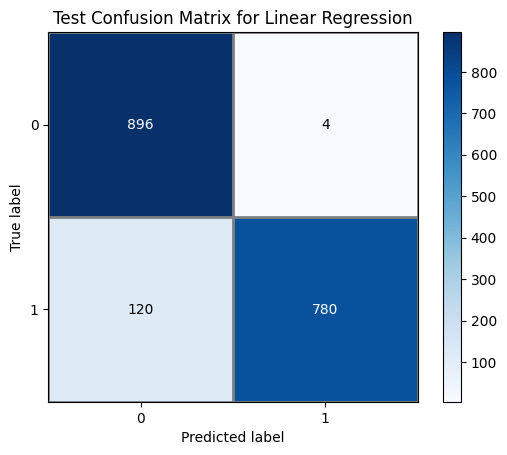

In [51]:
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(conf_matrx, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Add text annotations
thresh = conf_matrx.max() / 2.
for i in range(conf_matrx.shape[0]):
    for j in range(conf_matrx.shape[1]):
        ax.text(j, i, format(conf_matrx[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrx[i, j] > thresh else "black")

# Set plot labels
ax.set(xticks=np.arange(conf_matrx.shape[1]),
       yticks=np.arange(conf_matrx.shape[0]),
       xticklabels=['0', '1'],
       yticklabels=['0', '1'],
       title='Test Confusion Matrix for Linear Regression',
       ylabel='True label',
       xlabel='Predicted label')

# Add gridlines
ax.set_ylim(conf_matrx.shape[0] - 0.5, -0.5)
ax.set_xticks(np.arange(conf_matrx.shape[1] + 1) - .5, minor=True)
ax.set_yticks(np.arange(conf_matrx.shape[0] + 1) - .5, minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)

plt.show()


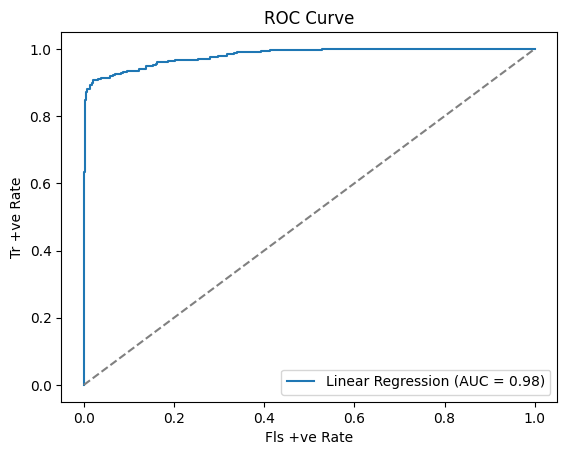

In [52]:

LRMod = LinearRegression()
LRMod.fit(R_trn , s_trn)
s_prb = LRMod.predict(R_tst)

# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, s_prb)

# Calculate AUC score
auc = roc_auc_score(s_tst, s_prb)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Linear Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Fls +ve Rate')
plt.ylabel('Tr +ve Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 3. XGBoost

Cross-validation Scores: [0.9952381  0.99761905 0.9952381  1.         0.9952381  0.99761905
 0.9952381  0.98333333 0.9952381  0.99761905]
Cross-validation Average Score: 0.9952380952380953


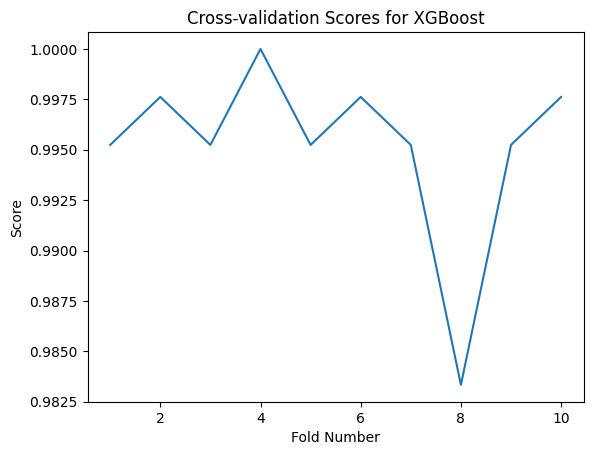

In [53]:
#Cross-validation

XGBMod = xgb.XGBClassifier()
cvs = cross_val_score(XGBMod, R_trn , s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for XGBoost')
plt.show()

In [54]:
# Load XGBoost Model
XGBMod = xgb.XGBClassifier()

# Fit the model on the training data
XGBMod.fit(R_trn , s_trn)

# Predict the outputs for the training data
train_preds = XGBMod.predict(R_trn )

# Print the classification values and accuracy score for training data
print('Training Set Results for XGBoost:')
print(classification_report(s_trn, train_preds))
xgb_acc = round(accuracy_score(s_trn, train_preds)*100, 2)
print('Training Set Accuracy for XGBoost:', xgb_acc, '%')
print()

# Predict the outputs for the testing data
tst_prdc = XGBMod.predict(R_tst)

# Print the classification values and accuracy score for the testing data
print('Testing Set Results for XGBoost:')
print(classification_report(s_tst, tst_prdc))
xgb_acc = round(accuracy_score(s_tst, tst_prdc)*100, 2)
print('Testing Set Accuracy for XGBoost:', xgb_acc, '%')


Training Set Results for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training Set Accuracy for XGBoost: 100.0 %

Testing Set Results for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       900
           1       1.00      0.99      0.99       900

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800

Testing Set Accuracy for XGBoost: 99.22 %


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

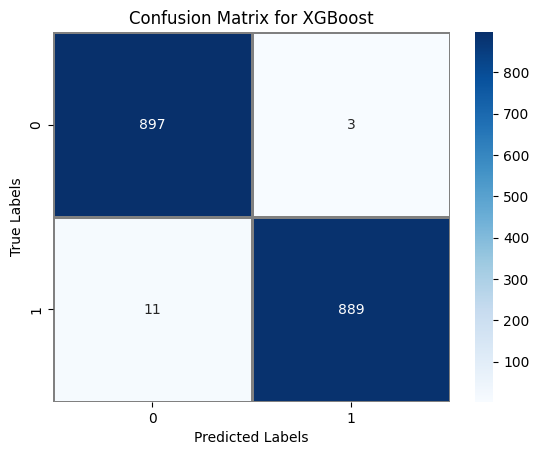

In [55]:
# Create a confusion matrix
cm = confusion_matrix(s_tst, tst_prdc)

# Plot the confusion matrix
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=1, linecolor='gray')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


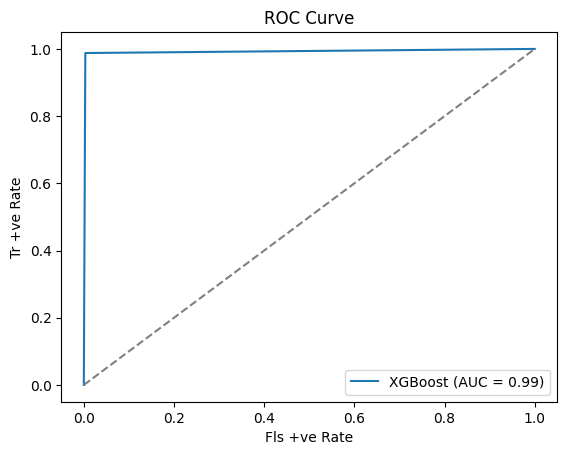

In [56]:

XGBMod = xgb.XGBClassifier()
XGBMod.fit(R_trn , s_trn)
s_prb = XGBMod.predict(R_tst)

# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, s_prb)

# Calculate AUC score
auc = roc_auc_score(s_tst, s_prb)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Fls +ve Rate')
plt.ylabel('Tr +ve Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 4. Multi-Layer Perceptron

Cross-validation Scores: [0.98809524 0.98571429 0.99285714 0.99047619 0.98333333 0.98809524
 0.9952381  0.98333333 0.9952381  0.9952381 ]
Cross-validation Average Score: 0.9897619047619047


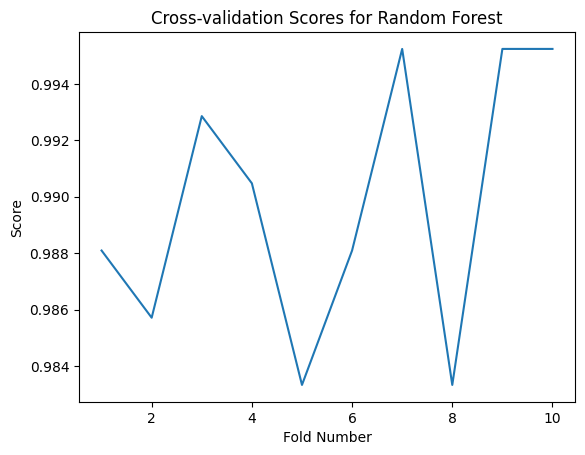

In [57]:
n = 50
MLPMod = MLPClassifier(n,random_state=2)
cvs = cross_val_score(MLPMod, R_trn , s_trn, cv=10)
print('Cross-validation Scores:', cvs)
print('Cross-validation Average Score:', cvs.mean())

plt.plot(range(1, 11), cvs)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross-validation Scores for Random Forest')
plt.show()

In [58]:
#Load Multi-Layer Perceptron Model
MLPMod = MLPClassifier(n,random_state=2)

# Fit the model on the training data
MLPMod.fit(R_trn ,s_trn)

# Predict the outputs for the training data
trains = MLPMod.predict(R_trn )
print('Training Set Results for Multi-Layer Perceptron:')

# Print the classification values and accuracy score for the training data
print(classification_report(s_trn,trains.round()))
mlacc=round(accuracy_score(s_trn,trains.round())*100,2)
print('Training Set Accuracy for Multi-Layer Perceptron: '+str(mlacc)+'%')
print()

# Predict the outputs for the testing data
preds = MLPMod.predict(R_tst)
print('Test Results for Multi-Layer Perceptron:')

# Print the classification values and accuracy score for testing data
print(classification_report(s_tst,preds.round()))
mlacc=round(accuracy_score(s_tst,preds.round())*100,2)
print('Test accuracy Multi-Layer Perceptron: '+str(mlacc)+'%')

Training Set Results for Multi-Layer Perceptron:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

Training Set Accuracy for Multi-Layer Perceptron: 99.86%

Test Results for Multi-Layer Perceptron:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.99      0.99      0.99       900

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800

Test accuracy Multi-Layer Perceptron: 98.72%


#### Plotting the Confusion Matrix and the ROC to determine the outcomes

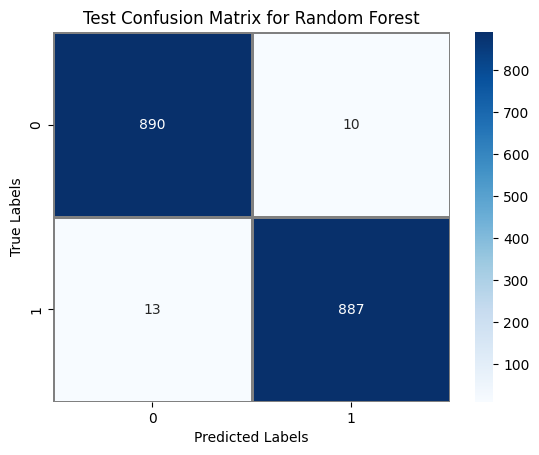

In [59]:
# Fit the model
n = 50
MLPMod = MLPClassifier(n,random_state=2)
MLPMod.fit(R_trn ,s_trn)

# Test Set
tst_prdc = MLPMod.predict(R_tst)
conf_matrx = confusion_matrix(s_tst, tst_prdc.round())

# Plot confusion matrix
sbn.heatmap(conf_matrx, annot=True, fmt='g', cmap='Blues', cbar=True, linewidths=1, linecolor='gray')
plt.title('Test Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


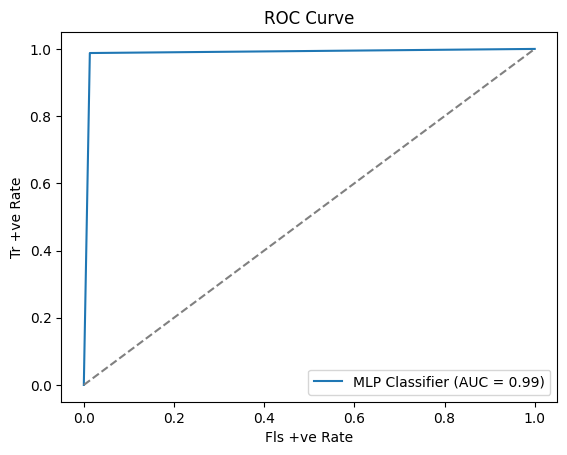

In [60]:

MLPMod = MLPClassifier()
MLPMod.fit(R_trn ,s_trn)
s_prb = MLPMod.predict(R_tst)

# Calculate false positive rate (fpr), true positive rate (tpr), and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(s_tst, s_prb)

# Calculate AUC score
auc = roc_auc_score(s_tst, s_prb)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'MLP Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Fls +ve Rate')
plt.ylabel('Tr +ve Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()